In [ ]:
import numpy as np
from numpy import pi, cos, sin
from numpy.linalg import norm
import pandas as pd

import matplotlib.pyplot as plt

from scipy import linalg
from scipy.linalg import eigh
from scipy.spatial.distance import pdist, squareform 

import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.datasets import make_circles, make_moons

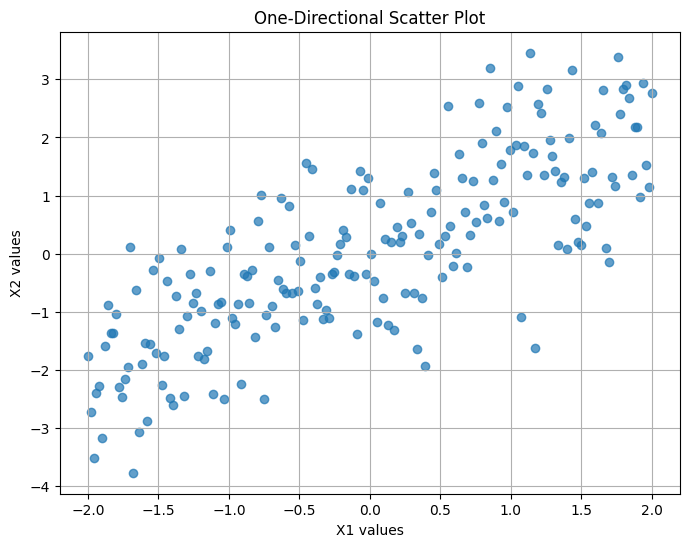

In [34]:
# Generate random data with one-directional trend
np.random.seed(34)
x1 = np.linspace(-2, 2, 200)  # Increasing x values
x2 = x1 + np.random.normal(scale=1, size=200)  # Adding some noise

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, alpha=0.7)
plt.xlabel("X1 values")
plt.ylabel("X2 values")
plt.title("One-Directional Scatter Plot")
plt.grid(True)

# Show plot
plt.show()

X=np.column_stack((x1,x2)) # combining the x and y points


In [35]:

X_mean=X.mean(axis=0)
print(X_mean)

X_cent=X-X_mean

X_cent.shape






[0.         0.04790994]


(200, 2)

In [36]:
X_cov=np.cov(X_cent, rowvar=False) # rowvar=F
X_cov

array([[1.35350117, 1.40826519],
       [1.40826519, 2.39943917]])

In [37]:
eigenval, eigenvec= linalg.eig(X_cov)

print(eigenval)
print(eigenvec)

[0.37423603+0.j 3.37870431+0.j]
[[-0.82101385 -0.57090827]
 [ 0.57090827 -0.82101385]]


In [38]:
## sorting using indices first but in acsending order
# Flipped it to descending order 
sorted_indices=np.argsort(eigenval)
sorted_indices=sorted_indices[::-1]



In [39]:
eigenval_sorted=eigenval[sorted_indices]
eigenval_sorted

array([3.37870431+0.j, 0.37423603+0.j])

In [40]:
eigenvec_sorted = eigenvec[:, sorted_indices]

print(eigenvec)
print(eigenvec_sorted)




[[-0.82101385 -0.57090827]
 [ 0.57090827 -0.82101385]]
[[-0.57090827 -0.82101385]
 [-0.82101385  0.57090827]]


In [41]:
## Projection matrix
n_pca=1

proj_matrix = eigenvec_sorted[:, :n_pca]
proj_matrix.shape

X_pca=X_cent.dot(proj_matrix)
X_pca.shape

(200, 1)

In [42]:
Z = X_cent.dot(proj_matrix)

# Reduced dataset 
X_pca = Z.dot(proj_matrix.T)
print(X_pca.shape)
print(proj_matrix.shape)

(200, 2)
(2, 1)


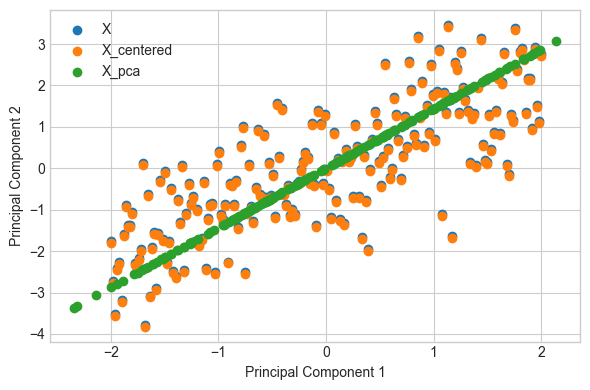

In [43]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], label='X')
    plt.scatter(X_cent[:, 0], X_cent[:, 1], label='X_centered')
    plt.scatter(X_pca[:, 0], X_pca[:, 1], label='X_pca')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [44]:
def f_pca(X,n_pca):

    #centralizing the data
    X_mean=X.mean(axis=0)
    X_cent=X-X_mean

    #covariance matrix calculation
    X_cov=np.cov(X_cent, rowvar=False) # rowvar=F
    

    eigenval, eigenvec= linalg.eig(X_cov)

    ## sorting using indices first but in acsending order
    # Flipped it to descending order 
    sorted_indices=np.argsort(eigenval)
    sorted_indices=sorted_indices[::-1]

    eigenval_sorted=eigenval[sorted_indices]
    eigenval_sorted

    eigenvec_sorted = eigenvec[:, sorted_indices]

    ## Projection matrix
    

    proj_matrix = eigenvec_sorted[:, :n_pca]
    

    X_pca=X_cent.dot(proj_matrix)
    
    return X_pca



    

In [45]:
#f_pca(X,1)

In [49]:
data = load_iris()
X = data['data']
Y = data['target']
print(X.shape)


(150, 4)


In [ ]:
X_pca = f_pca(X, n_pca=2)




Text(0, 0.5, 'Second Principal Component')

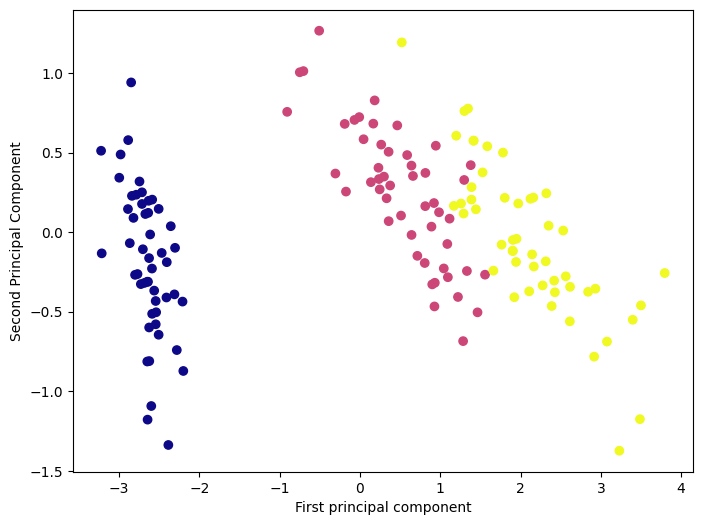

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

##### Testing with array operation

In [ ]:
## test to check array operations
T = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
print(T)

print(T[1:])

print(T[0,0])


[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[4 5 6]
 [7 8 9]]
1


In [ ]:
print(T[:,[0]]) # selecting all rows and first column 

print(T[:,:]) # this the complete structure sort of

print(T[1:,1:])


[[1]
 [4]
 [7]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[5 6]
 [8 9]]


In [ ]:
print(T[:,[2,0]]) # can be selected using sorted indices 

[[3 1]
 [6 4]
 [9 7]]
